# Use Case: Molecular Design

Here we use ProxyStore to speed up a multi-site molecular design application.

## Instructions

This application uses two systems to run a molecular design workflow.
The first system is ALCF's Theta which is used to run XTB simulations on the Intel KNL CPU nodes.
The second system is lambda5/venti, a GPU node with 20 NVIDIA T4 GPUs hosted by CELS.
The following instructions are specific to these systems, though the general steps should apply to others.

### Theta Setup

### Venti Setup
   
### Run

### Process Results

In [3]:
%matplotlib inline

from __future__ import annotations

import math
from typing import Any

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.markers as markers
import pandas
import numpy

from matplotlib.ticker import ScalarFormatter

In [4]:
PROXYSTORE = 'ProxyStore'

NODES = [8, 128, 256, 512, 1024]
DATA = {
    'Baseline': {
        'CPU': [0.8646902807438533, 0.9269573068818762, 0.8966170705131524, 0.7744384621092077, 0.5054420692137886],
        'GPU': [0.6796688040980168, 0.6830119733745553, 0.6885930245770308, 0.6468972488583706, 0.6319716190305118], 
    },
    PROXYSTORE: {
        'CPU': [0.9037363629501167, 0.9452118492686217, 0.9469055766535985, 0.9966119531980637, 0.724352640451033],
        'GPU': [0.7997412334690767, 0.7926567447094113, 0.8052310308176625, 0.7954557628130213, 0.7549243745886568],
    }
}

if True:
    # Drops the 8 node runs
    NODES = NODES[1:]
    for config, tasks in DATA.items():
        for system, utils in tasks.items():
            DATA[config][system] = utils[1:]

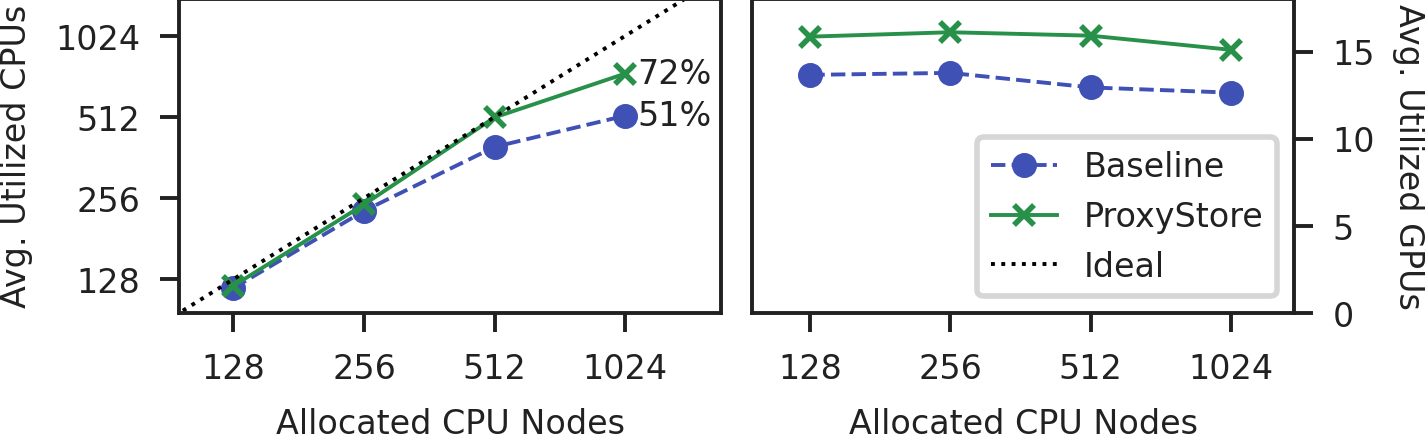

In [6]:
MARKERS = ('o', 'x')
LINES = ('--', '-')

fig, axs = plt.subplots(1, 2)

for i, (config, tasks) in enumerate(DATA.items()):
    for j, (system, utils) in enumerate(tasks.items()):
        # utils = [u * 100 for u in utils]
        x = NODES
        
        if system == 'CPU':
            y = [u * x[k] for k, u in enumerate(utils)]
        else:
            y = [u * 20 for u in utils]
        
        axs[j].plot(
            x,
            y,
            linestyle=LINES[i],
            marker=MARKERS[i],
            label=config,
        )

        axs[j].set_xlabel('Allocated CPU Nodes')


axs[0].set_ylabel('Avg. Utilized CPUs')
axs[0].set_xscale('log', base=2)
axs[0].set_yscale('log', base=2)
axs[0].set_xticks(NODES)
axs[0].set_yticks([8, 16, 32, 64, 128, 256, 512, 1024])
for axis in [axs[0].xaxis, axs[0].yaxis]:
    axis.set_major_formatter(ScalarFormatter())
axs[0].plot((0, 2048), (0, 2048), color='black', linestyle = ':', label='Ideal')
# axs[0].set_xlim([5, 740])
# axs[0].set_ylim([5, 740])
axs[0].set_xlim([96, 1700])
axs[0].set_ylim([96, 1400])


axs[1].set_ylabel('Avg. Utilized GPUs', rotation=270, labelpad=9)
# axs[1].axhline(y=20, color='black', linestyle = ':', label='Ideal')
axs[1].set_yticks([0, 5, 10, 15])
axs[1].set_xscale('log', base=2)
axs[1].set_ylim([0, 18])
axs[1].set_xlim([96, 1400])
axs[1].yaxis.tick_right()
axs[1].yaxis.set_label_position("right")
for axis in [axs[1].xaxis, axs[1].yaxis]:
    axis.set_major_formatter(ScalarFormatter())

x1, y1 = NODES[-1], DATA[PROXYSTORE]['CPU'][-1]
x2, y2 = NODES[-1], DATA['Baseline']['CPU'][-1]
axs[0].annotate(
    f'{y1 * 100:.0f}%',
    xy=(490, 480),
    xytext=(x1*1.3, x1*y1),
    fontsize=6,
    va="center",
    ha="center"
)
axs[0].annotate(
    f'{y2 * 100:.0f}%',
    xy=(512, 290),
    xytext=(x2*1.3, x2*y2),
    fontsize=6,
    va="center",
    ha="center"
)

handles, labels = axs[0].get_legend_handles_labels()
axs[1].legend(handles, labels, loc='lower right')

fig.tight_layout()

fig.set_size_inches(3.35, 0.9)
plt.savefig('figures/moldesign-scaling.pdf', pad_inches=0.05)